# Stock Prediction Analysis
This notebook prototypes the stock prediction model using `yfinance` and `scikit-learn`.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from model_utils import fetch_stock_data, calculate_technical_indicators, train_model, predict_next_move

%matplotlib inline

## 1. Fetch Data

In [2]:
ticker = "NVDA"
df = fetch_stock_data(ticker)
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-01-02 00:00:00-05:00,49.216575,49.267546,47.568495,48.141174,411254000,0.0,0.0
2024-01-03 00:00:00-05:00,47.458562,48.157170,47.293653,47.542515,320896000,0.0,0.0
2024-01-04 00:00:00-05:00,47.740401,48.472995,47.481546,47.971275,306535000,0.0,0.0
2024-01-05 00:00:00-05:00,48.435012,49.519407,48.279097,49.069656,415039000,0.0,0.0
2024-01-08 00:00:00-05:00,49.484433,52.245895,49.451450,52.223904,642510000,0.0,0.0


## 2. Feature Engineering

<Axes: title={'center': 'NVDA Stock Price with SMA'}, xlabel='Date'>

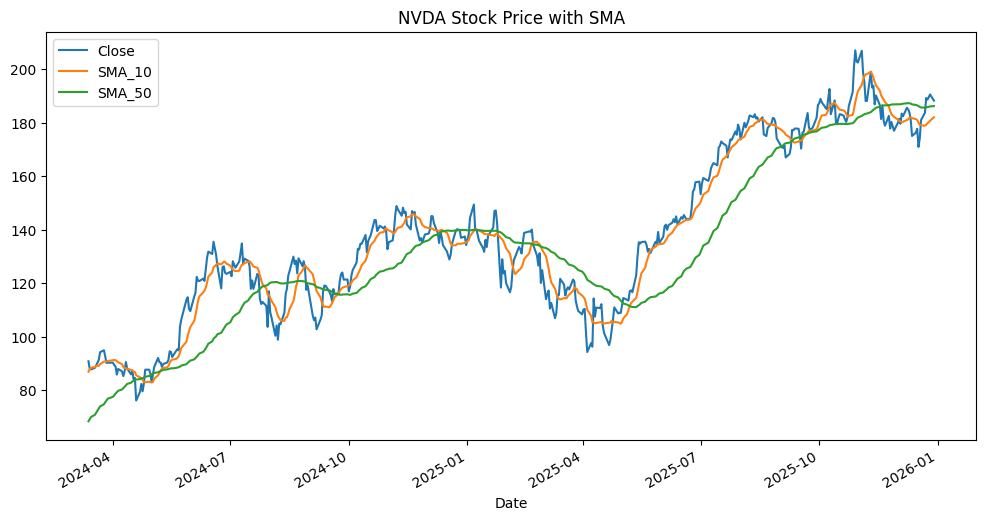

In [3]:
df = calculate_technical_indicators(df)
df[['Close', 'SMA_10', 'SMA_50']].plot(figsize=(12,6), title=f"{ticker} Stock Price with SMA")

## 3. Model Training

In [4]:
model, precision, predictors = train_model(df)
print(f"Model Precision: {precision:.2f}")

Model Precision: 0.51


## 4. Prediction

In [5]:
prediction, prob = predict_next_move(model, df, predictors)
print(f"Prediction for tomorrow: {prediction} (Confidence: {prob:.2f})")

Prediction for tomorrow: Sell (Confidence: 0.55)
